In [13]:
import pandas as pd
import numpy as np

import ast

import seaborn as sns
from matplotlib import pyplot
%matplotlib inline

# import data and check data types

In [15]:
# movie = pd.read_csv('movies_metadata.csv',dtype={'popularity':'float64'})
movie = pd.read_csv('..\data\movies_metadata.csv',low_memory=False)

In [16]:
# get the column names
movie.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [17]:
# get an overview of the dataset and print the column dtypes
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [18]:
print(movie.sample(3))

       adult                              belongs_to_collection    budget  \
14722  False  {'id': 242587, 'name': 'Rudolph the Red-Nosed ...         0   
15815  False                                                NaN  60000000   
21694  False                                                NaN  12000000   

                                                  genres  \
14722  [{'id': 16, 'name': 'Animation'}, {'id': 10751...   
15815                      [{'id': 18, 'name': 'Drama'}]   
21694  [{'id': 18, 'name': 'Drama'}, {'id': 12, 'name...   

                                              homepage      id    imdb_id  \
14722                                              NaN   13382  tt0058536   
15815  http://www.sonypictures.com/movies/eatpraylove/   38167  tt0879870   
21694                                              NaN  129670  tt1821549   

      original_language                   original_title  \
14722                en  Rudolph, the Red-Nosed Reindeer   
15815                

# remove duplicate rows

In [19]:
# find duplicate data
duplicate = movie[movie.duplicated()]
duplicate

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
1465,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,105045,tt0111613,de,Das Versprechen,"East-Berlin, 1961, shortly after the erection ...",...,1995-02-16,0.0,115.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,"A love, a hope, a wall.",The Promise,False,5.0,1.0
9165,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,5511,tt0062229,fr,Le Samouraï,Hitman Jef Costello is a perfectionist who alw...,...,1967-10-25,39481.0,105.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,There is no solitude greater than that of the ...,Le Samouraï,False,7.9,187.0
9327,False,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",NaN,23305,tt0295682,en,The Warrior,"In feudal India, a warrior (Khan) who renounce...",...,2001-09-23,0.0,86.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,NaN,The Warrior,False,6.3,15.0
13375,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,...,2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0
16764,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",NaN,141971,tt1180333,fi,Blackout,Recovering from a nail gun shot to the head an...,...,2008-12-26,0.0,108.0,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0
21165,False,NaN,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",NaN,119916,tt0080000,en,The Tempest,"Prospero, the true Duke of Milan is now living...",...,1980-02-27,0.0,123.0,[],Released,NaN,The Tempest,False,0.0,0.0
21854,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 878, 'nam...",NaN,152795,tt1821641,en,The Congress,More than two decades after catapulting to sta...,...,2013-05-16,455815.0,122.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Congress,False,6.4,165.0
22151,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...",http://www.daysofdarknessthemovie.com/,18440,tt0499456,en,Days of Darkness,When a comet strikes Earth and kicks up a clou...,...,2007-01-01,0.0,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Days of Darkness,False,5.0,5.0
23044,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,25541,tt1327820,da,Broderskab,Former Danish servicemen Lars and Jimmy are th...,...,2009-10-21,0.0,90.0,"[{'iso_639_1': 'da', 'name': 'Dansk'}]",Released,NaN,Brotherhood,False,7.1,21.0
24844,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.dealthemovie.com/,11115,tt0446676,en,Deal,As an ex-gambler teaches a hot-shot college ki...,...,2008-01-29,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Deal,False,5.2,22.0


In [20]:
# remove duplicate data
movie.drop(movie[movie.duplicated()].index,inplace=True)

# clean irrelevant observations

In [21]:
movie.status.unique()

array(['Released', nan, 'Rumored', 'Post Production', 'In Production',
       'Planned', 'Canceled'], dtype=object)

In [22]:
# filter only released movie
movie=movie[movie.status=='Released']
# mostly na columns and columns with similar information to other columns
movie=movie.drop(columns=['belongs_to_collection','budget','revenue', 'homepage', 'poster_path', 'spoken_languages','status','tagline','original_title'])

# clean structure errors

In [23]:
# get an overview of the dataset and print the column dtypes
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44998 entries, 0 to 45465
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 44998 non-null  object 
 1   genres                44998 non-null  object 
 2   id                    44998 non-null  object 
 3   imdb_id               44983 non-null  object 
 4   original_language     44988 non-null  object 
 5   overview              44078 non-null  object 
 6   popularity            44998 non-null  object 
 7   production_companies  44998 non-null  object 
 8   production_countries  44998 non-null  object 
 9   release_date          44920 non-null  object 
 10  runtime               44747 non-null  float64
 11  title                 44998 non-null  object 
 12  video                 44998 non-null  object 
 13  vote_average          44998 non-null  float64
 14  vote_count            44998 non-null  float64
dtypes: float64(3), obje

In [24]:
# adult should be a boolean variable
movie['adult'].unique()

array(['False', 'True'], dtype=object)

In [25]:
# remove data
movie.drop(movie[movie.adult==' - Written by Ørnås'].index,inplace=True)
movie.drop(movie[movie.adult==' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.'].index,inplace=True)
movie.drop(movie[movie.adult==' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.'].index,inplace=True)

In [26]:
movie.astype({'adult': 'bool','id':'int64','popularity':'float64'}).dtypes

adult                      bool
genres                   object
id                        int64
imdb_id                  object
original_language        object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
runtime                 float64
title                    object
video                    object
vote_average            float64
vote_count              float64
dtype: object

In [27]:
movie.drop(movie[movie.popularity=='Beware Of Frost Bites'].index,inplace=True)

In [28]:
# change dtype of release date  
movie.astype({'release_date':'datetime64[ns]'}).dtypes

adult                           object
genres                          object
id                              object
imdb_id                         object
original_language               object
overview                        object
popularity                      object
production_companies            object
production_countries            object
release_date            datetime64[ns]
runtime                        float64
title                           object
video                           object
vote_average                   float64
vote_count                     float64
dtype: object

In [29]:
movie['original_language'].unique()

array(['en', 'fr', 'zh', 'it', 'fa', 'nl', 'de', 'cn', 'ar', 'es', 'ru',
       'sv', 'ja', 'ko', 'sr', 'bn', 'he', 'pt', 'wo', 'ro', 'hu', 'cy',
       'vi', 'cs', 'da', 'no', 'nb', 'pl', 'el', 'sh', 'xx', 'mk', 'bo',
       'ca', 'fi', 'th', 'sk', 'bs', 'hi', 'tr', 'is', 'ps', 'ab', 'eo',
       'ka', 'mn', 'bm', 'zu', 'uk', 'af', 'la', 'et', 'ku', 'fy', 'lv',
       'ta', 'sl', 'tl', 'ur', 'rw', 'id', 'bg', 'mr', 'lt', 'kk', 'ms',
       'sq', nan, 'qu', 'te', 'am', 'jv', 'tg', 'ml', 'hr', 'lo', 'ay',
       'kn', 'eu', 'ne', 'pa', 'ky', 'gl', 'uz', 'sm', 'mt', 'hy', 'iu',
       'lb', 'si'], dtype=object)

In [30]:
# change dtype of release date  
movie.astype({'original_language':'category'}).dtypes

adult                     object
genres                    object
id                        object
imdb_id                   object
original_language       category
overview                  object
popularity                object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [31]:
movie.sample(3)

,adult,genres,id,imdb_id,original_language,overview,popularity,production_companies,production_countries,release_date,runtime,title,video,vote_average,vote_count
36105,False,[],145385,tt0385048,en,"""Last Hippie Standing"", 2002, is a video clip ...",0.078608,[],[],2002-03-31,45.0,Last Hippie Standing,False,5.5,2.0
12699,False,"[{'id': 53, 'name': 'Thriller'}, {'id': 878, '...",8645,tt0949731,en,When a deadly airborne virus threatens to wipe...,6.22229,"[{'name': 'Spyglass Entertainment', 'id': 158}...","[{'iso_3166_1': 'US', 'name': 'United States o...",2008-06-11,91.0,The Happening,False,4.9,968.0
14149,False,"[{'id': 18, 'name': 'Drama'}]",689,tt0073800,el,This expansive Greek drama follows a troupe of...,1.045352,"[{'name': 'Giorgos Papalios Productions', 'id'...","[{'iso_3166_1': 'GR', 'name': 'Greece'}]",1975-01-01,223.0,The Travelling Players,False,6.8,11.0


# handle missing data

In [32]:
movie.isnull().sum()

adult                     0
genres                    0
id                        0
imdb_id                  15
original_language        10
overview                920
popularity                0
production_companies      0
production_countries      0
release_date             78
runtime                 251
title                     0
video                     0
vote_average              0
vote_count                0
dtype: int64

In [33]:
movie.drop(columns=['overview'],inplace=True)

In [34]:
def clean(data):
    nan_value = np.nan
    # find out missing values in quote
    data.replace("", nan_value, inplace=True)
    data.replace(" ", nan_value, inplace=True)
    
    # find out missing values in fresh
    data.replace("none", nan_value, inplace=True)

    # clean fresh and quote by dropping N/As
    data.dropna(subset=['id','imdb_id','title'],inplace=True)
    
    return data

In [35]:
clean(movie)

,adult,genres,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,runtime,title,video,vote_average,vote_count
0,False,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,81.0,Toy Story,False,7.7,5415.0
1,False,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,104.0,Jumanji,False,6.9,2413.0
2,False,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,101.0,Grumpier Old Men,False,6.5,92.0
3,False,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,127.0,Waiting to Exhale,False,6.1,34.0
4,False,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,106.0,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",439050,tt6209470,fa,0.072051,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,90.0,Subdue,False,4.0,1.0
45462,False,"[{'id': 18, 'name': 'Drama'}]",111109,tt2028550,tl,0.178241,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,360.0,Century of Birthing,False,9.0,3.0
45463,False,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",67758,tt0303758,en,0.903007,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,90.0,Betrayal,False,3.8,6.0
45464,False,[],227506,tt0008536,en,0.003503,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,87.0,Satan Triumphant,False,0.0,0.0


# split datasets

In [36]:
# genres
genre = movie[["id","genres"]]
# production companies
production_company = movie[['id','production_companies']]
# production countries
production_country = movie[['id','production_countries']]
# remove these columns in movie dataset
movie=movie.drop(columns=['genres','production_companies','production_countries'])

# typos or inconsistent capitalization

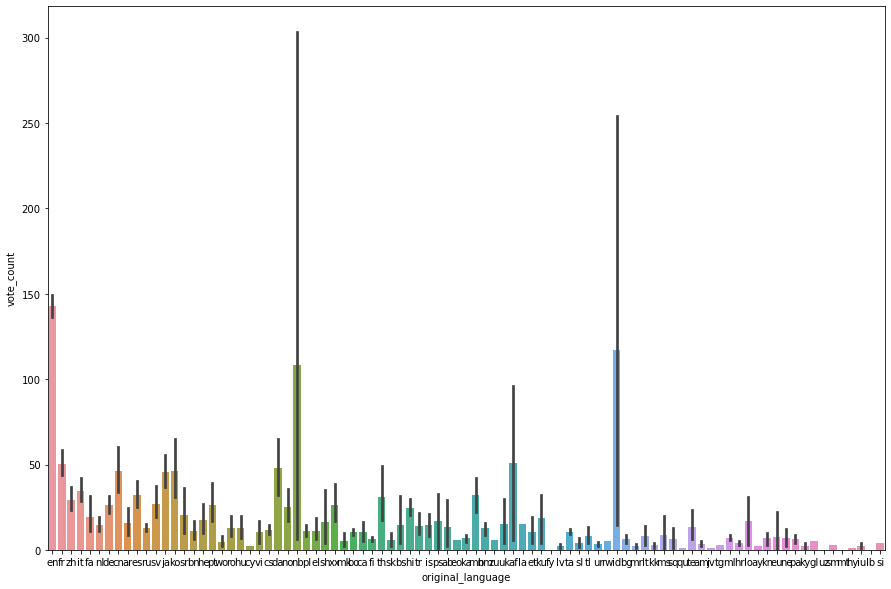

In [37]:
a4_dims = (15, 10)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.barplot(ax=ax,x="original_language", y="vote_count", data=movie)

# export data

In [39]:
genre.rename(columns = {'id':'mid'}, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [43]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44983 entries, 0 to 45465
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              44983 non-null  object 
 1   id                 44983 non-null  object 
 2   imdb_id            44983 non-null  object 
 3   original_language  44973 non-null  object 
 4   popularity         44983 non-null  object 
 5   release_date       44908 non-null  object 
 6   runtime            44734 non-null  float64
 7   title              44983 non-null  object 
 8   video              44983 non-null  bool   
 9   vote_average       44983 non-null  float64
 10  vote_count         44983 non-null  float64
dtypes: bool(1), float64(3), object(7)
memory usage: 5.1+ MB


In [42]:
movie.to_csv('..\data\movie.csv',index=False)
genre.to_csv('..\data\genre.csv',index=False)
production_company.to_csv('..\data\production_company.csv',index=False)
production_country.to_csv('..\data\production_country.csv',index=False)